In [4]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
nlp = spacy.load('en_core_web_md')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [2]:
pip install chart-studio

In [ ]:

data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

In [5]:
data=pd.read_csv("../Dataset/Womens Clothing E-Commerce Reviews.csv")

In [6]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
data.drop('Unnamed: 0', axis=1, inplace=True)


In [8]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
data.drop('Title', axis=1, inplace=True)


In [10]:
data.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [11]:
data = data[~data['Review Text'].isnull()]


In [12]:
data.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Preprocess text

In [13]:
def clean(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
data['Review Text'] = clean(data['Review Text'])

we use textblob for ploarity

In [14]:
data['polarity'] = data['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)
data['review_lenth'] = data['Review Text'].astype(str).apply(len)
data['word_count'] = data['Review Text'].apply(lambda x: len(str(x).split()))

In [15]:
data.polarity.min()


-0.9750000000000001

Sentiment Polarity Distribution

<AxesSubplot:ylabel='Frequency'>

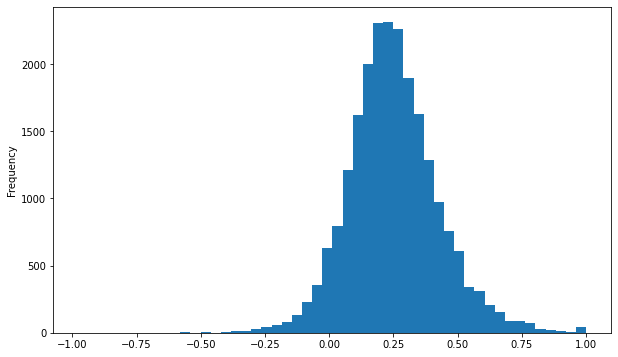

In [18]:
data['polarity'].plot(
    kind='hist',
    bins=50,
    )

In [ ]:
'Review Rating Distribution

<AxesSubplot:ylabel='Frequency'>

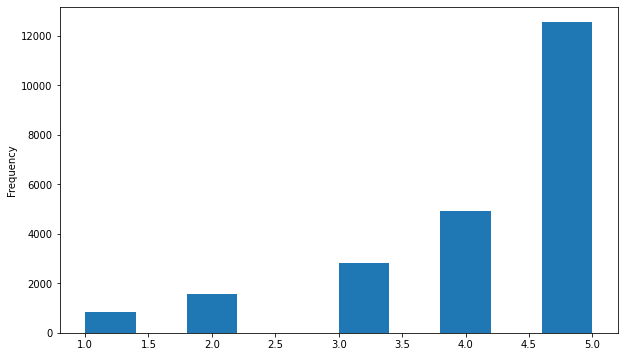

In [20]:
data['Rating'].plot(
    kind='hist')
    


In [24]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['Review Text'], 10)
for word, freq in common_words:
    print(word, freq)
data1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

the 76166
it 49284
and 49009
is 30641
this 25762
to 24583
in 20723
but 16556
on 15328
for 14000


Remove stop of words

In [26]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['Review Text'], 10)
for word, freq in common_words:
    print(word, freq)
data2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

dress 10567
love 8951
size 8772
fit 7325
like 7149
wear 6439
great 6117
just 5608
fabric 4798
small 4729


Let's see the bigrams

In [28]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['Review Text'], 10)
for word, freq in common_words:
    print(word, freq)
data4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

true size 1347
love dress 766
usually wear 691
looks great 620
fit perfectly 609
size small 540
fits perfectly 489
usual size 479
look like 425
just right 423


In [30]:

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
data5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

fits true size 280
fit true size 229
runs true size 148
love love love 143
usually wear size 136
ordered usual size 107
does run large 95
really wanted love 94
wanted love dress 88
usually wear small 80
small fit perfectly 77
looks great jeans 70
fit like glove 69
usually wear medium 68
normally wear size 68
small fits perfectly 65
size fit perfectly 65
fits like glove 65
usual size small 64
usually wear xs 63


part of speech

<AxesSubplot:>

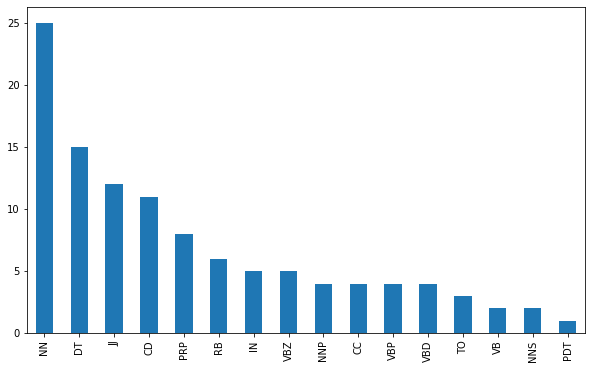

In [34]:
blob = TextBlob(str(data['Review Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar')

In [37]:

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

In [35]:
data['Rating'] = data['Rating'].replace(1, 0)
data['Rating'] = data['Rating'].replace(2, 0)
data['Rating'] = data['Rating'].replace(3, 0)
data['Rating'] = data['Rating'].replace(4, 1)
data['Rating'] = data['Rating'].replace(5, 1)

In [36]:
data.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,review_lenth,word_count
0,767,33,Absolutely wonderful - silky and sexy and comf...,1,1,0,Initmates,Intimate,Intimates,0.633333,53,8
1,1080,34,Love this dress! it's sooo pretty. i happene...,1,1,4,General,Dresses,Dresses,0.339583,303,62
2,1077,60,I had such high hopes for this dress and reall...,0,0,0,General,Dresses,Dresses,0.073675,500,98
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",1,1,0,General Petite,Bottoms,Pants,0.550000,124,22
4,847,47,This shirt is very flattering to all due to th...,1,1,6,General,Tops,Blouses,0.512891,192,36


In [38]:
data.shape


(22641, 12)

Density Plot


<AxesSubplot:xlabel='Age', ylabel='Density'>

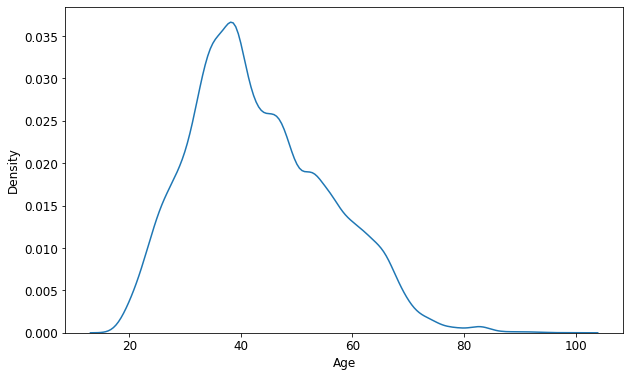

In [46]:
sns.kdeplot(data.Age)


Division Name frequency

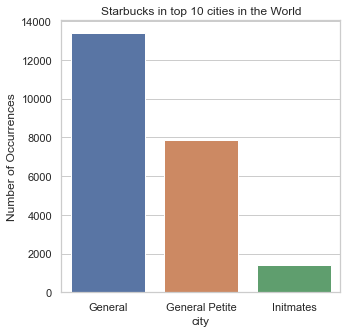

In [64]:
city_count  = data['Division Name'].value_counts()
#city_count = city_count[:10,]
plt.figure(figsize=(5,5))
sns.barplot(city_count.index, city_count.values)
plt.title('Starbucks in top 10 cities in the World')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

Department Name frequency

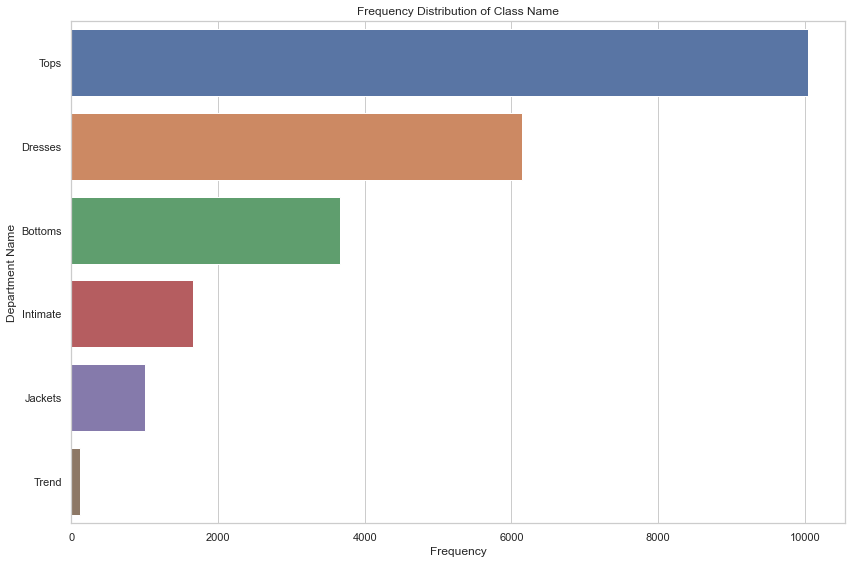

In [69]:
plt.subplots(figsize=(12, 8))
order=data['Department Name'].value_counts()
sns.countplot(y='Department Name', data=data,order=order.index)
plt.title('Frequency Distribution of Class Name')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

WordClouds by Department Name


In [73]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS

ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

ModuleNotFoundError: No module named 'wordcloud'

In [74]:
pip install wordcloud

In [72]:

department_set = data['Department Name'][data['Department Name'].notnull()].unique()
division_set = data['Division Name'][data['Division Name'].notnull()].unique()
def cloud_by_category(data, category, subclass):
    """Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable"""
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data['Class Name'][data['Class Name'].notnull()].unique())]
                   + [x.lower() for x in list(data['Department Name'][data['Department Name'].notnull()].unique())]
                   + ['dress', 'petite', 'jacket', 'top'])

    # Cloud
    cloud(text= data['Review Text'][data[category]== subclass],
          title='WordCloud for {}'.format(subclass),
          stopwords= new_stop,
          size = (10,6))
    
# Plot
cloud_by_category(data, 'Division Name', division_set[0])
cloud_by_category(data, 'Division Name', division_set[1])
cloud_by_category(data, 'Division Name', division_set[2])

NameError: name 'STOPWORDS' is not defined